In [7]:
data(iris)

In [8]:
library("class")
library(ggplot2)
library(pROC)

In [9]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] 9

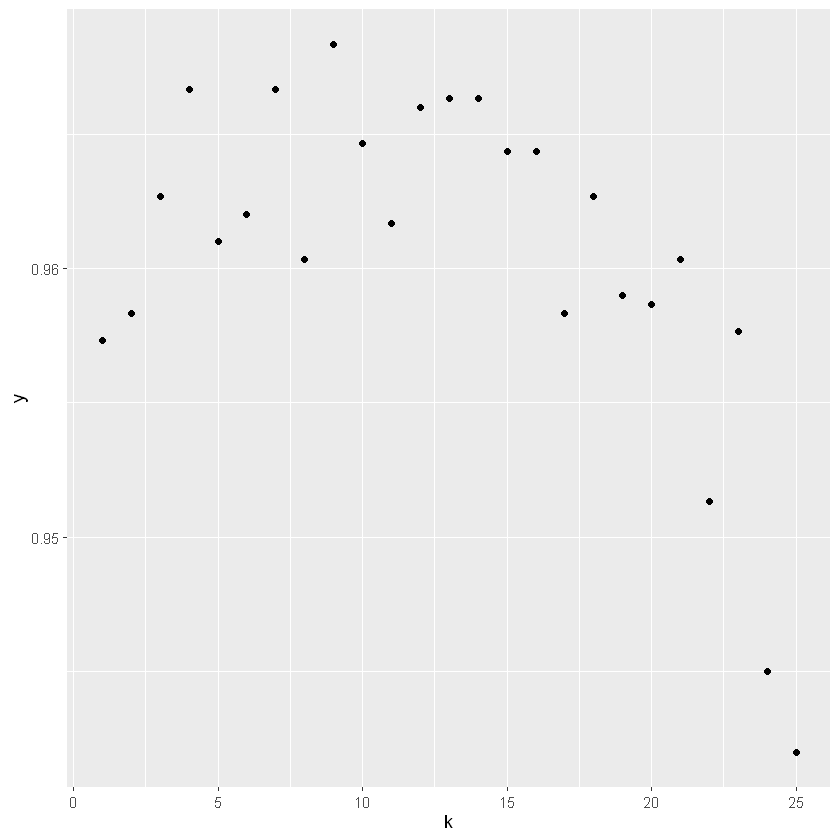

In [23]:
accuracy = c()
for (k1 in 1:25) {
    a = c()
    for (i in 1:100) {
        training_indices = sample(seq_len(nrow(iris)), size = 120)
        tr = iris[training_indices,]
        nw = iris[-training_indices,]
        knn.result <- knn(tr[,-5], nw[, -5], tr$Species, k=k1)
        a = c(a, mean(knn.result == nw$Species))
    }
    accuracy = c(accuracy, mean(a))
}
acc_df = data.frame(k=1:25, y=accuracy)
ggplot(acc_df, aes(x=k, y=y)) + geom_point()
which.max(accuracy)

            
knn.result   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0          5         2
  virginica       0          0        13

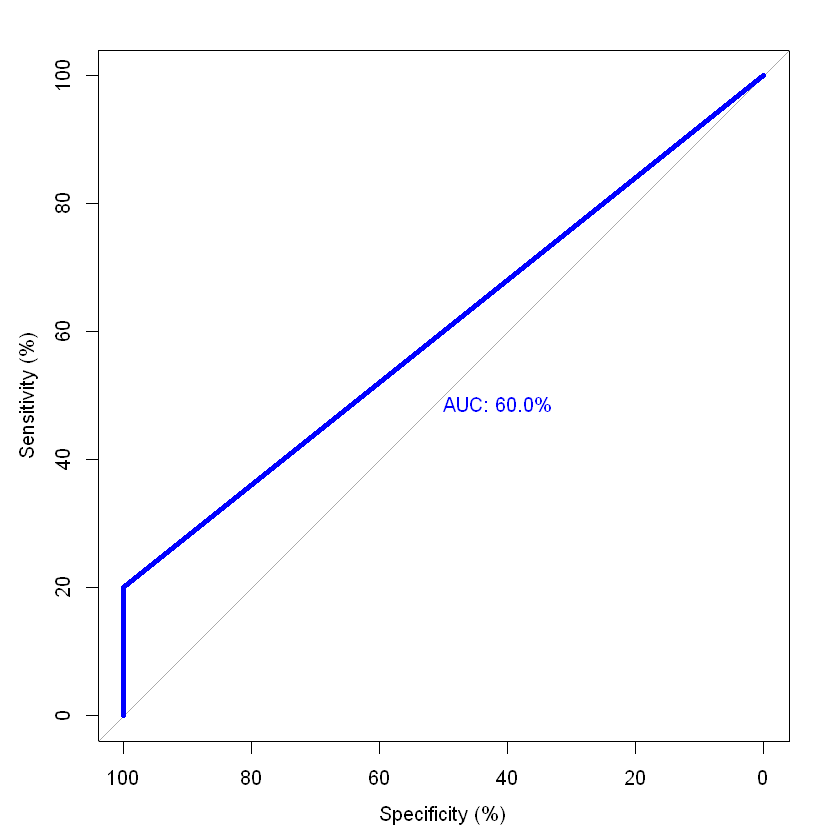

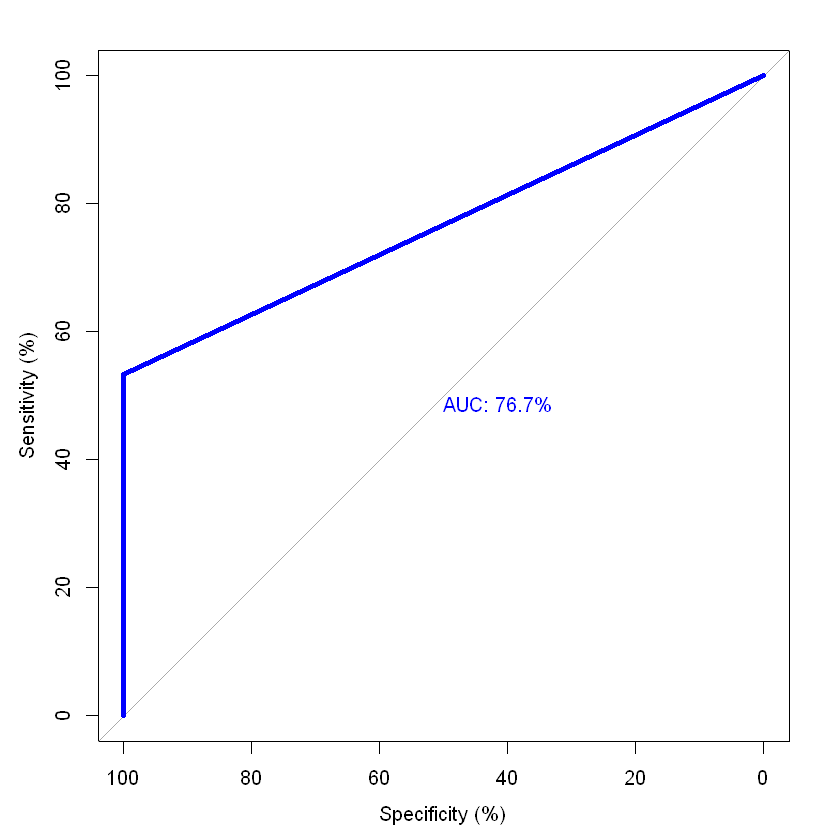

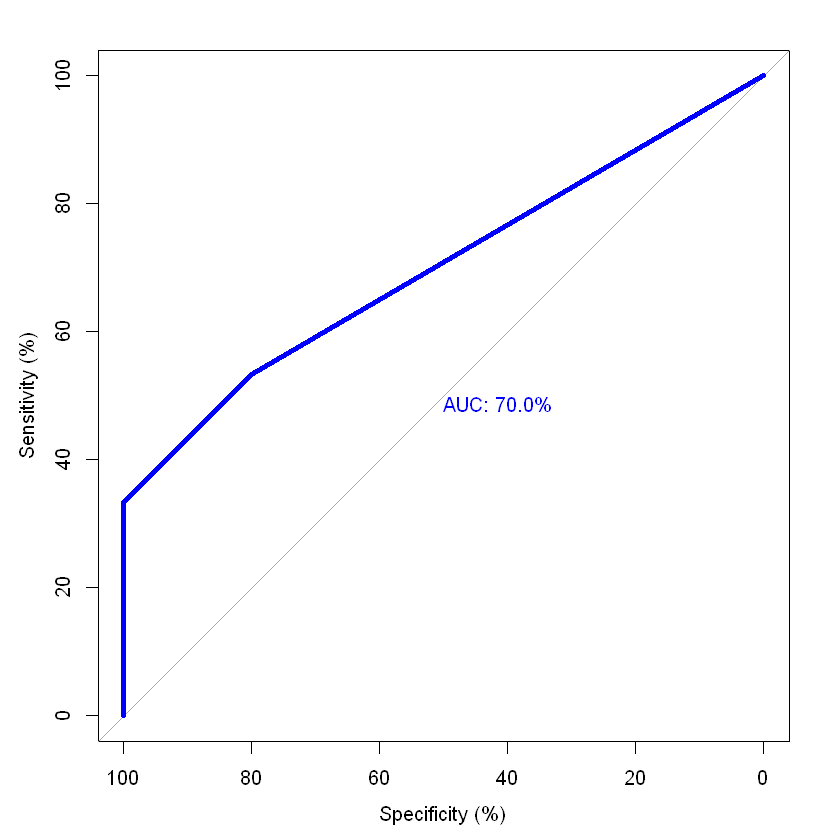

In [33]:
k = 13

training_indices = sample(seq_len(nrow(iris)), size = 120)
tr = iris[training_indices,]
nw = iris[-training_indices,]
knn.result <- knn(tr[,-5], nw[, -5], tr$Species, k=k, prob=TRUE)
cm = table(knn.result, nw$Species)
cm
roc_result <- multiclass.roc(nw$Species, attributes(knn.result)$prob, plot=TRUE, percent=TRUE,col="blue", lwd=4,direction=">", print.auc=TRUE)